# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [6]:
# make_regression로 데이터 생성
x,y= make_regression(n_samples = 1000, n_features= 10, noise= 0.01, random_state=100)


In [8]:
data = pd.DataFrame(x)
data['y'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,y
0,-2.378388,-0.018561,0.423080,-0.012915,-1.203272,0.040468,-0.162610,0.998690,-1.089383,-1.061973,-154.269889
1,0.377426,0.928212,-0.787901,1.560723,2.033323,1.301610,0.968905,0.581263,0.707994,0.170771,264.621950
2,0.828871,0.836024,-1.008787,0.260175,1.286136,-1.186850,0.223268,-1.799471,0.429636,-0.849123,-77.511625
3,0.830070,-0.368281,2.114972,1.689280,1.940821,-2.189701,-0.542634,-0.841902,-1.834426,-0.907785,-45.264631
4,0.493995,1.422161,-0.267136,-0.424175,-1.346520,-0.560759,-0.665442,1.173333,-0.391320,-1.481457,-94.827217


# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


,0,1,2,3,4,5,6,7,8,9,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.048227,0.034539,-0.013798,-0.060708,0.021921,-0.001967,-0.038572,-0.013845,0.020876,0.014839,0.007710
std,1.027028,1.016751,1.013453,1.031003,0.994997,1.003878,0.975699,1.012435,0.998723,0.987611,168.006867
min,-2.883730,-3.300080,-2.899215,-3.209955,-2.938700,-2.752038,-3.019478,-2.892240,-3.022235,-2.939454,-538.425467
25%,-0.629305,-0.649305,-0.702863,-0.746872,-0.645573,-0.685996,-0.674372,-0.711502,-0.657069,-0.656502,-112.745701
50%,0.027917,0.064015,-0.033428,-0.068698,0.022858,0.010010,-0.039729,0.017396,0.040000,-0.014838,-5.208458
75%,0.766832,0.735364,0.635707,0.636309,0.688456,0.687823,0.614599,0.731570,0.683551,0.656651,115.890159
max,2.942414,3.857940,3.447513,3.458597,3.453524,3.334204,3.209154,2.883969,3.819192,3.695300,548.623338


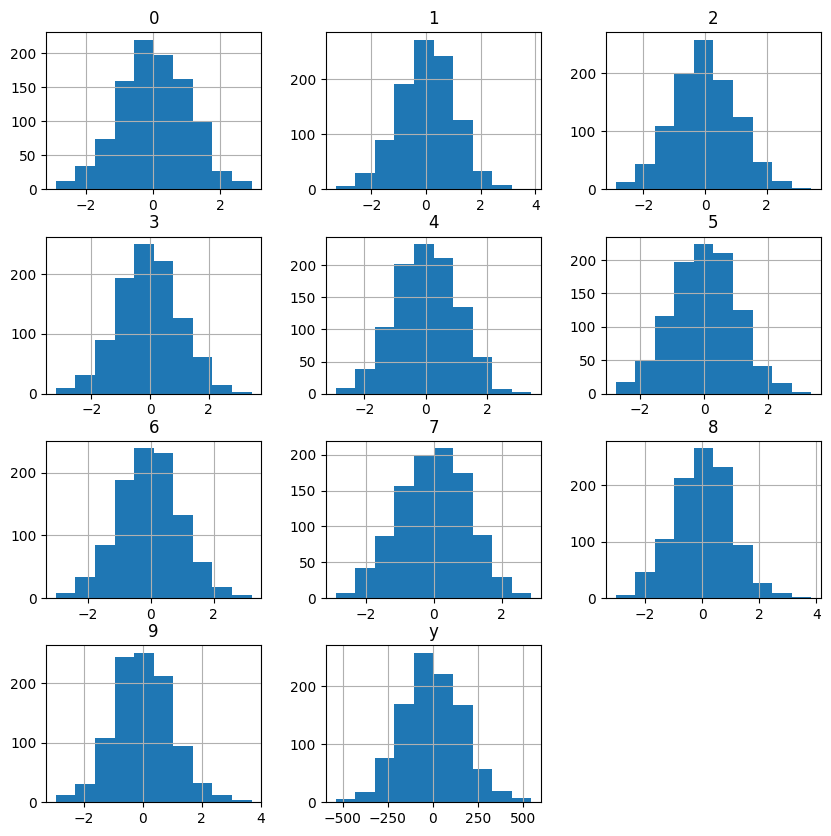

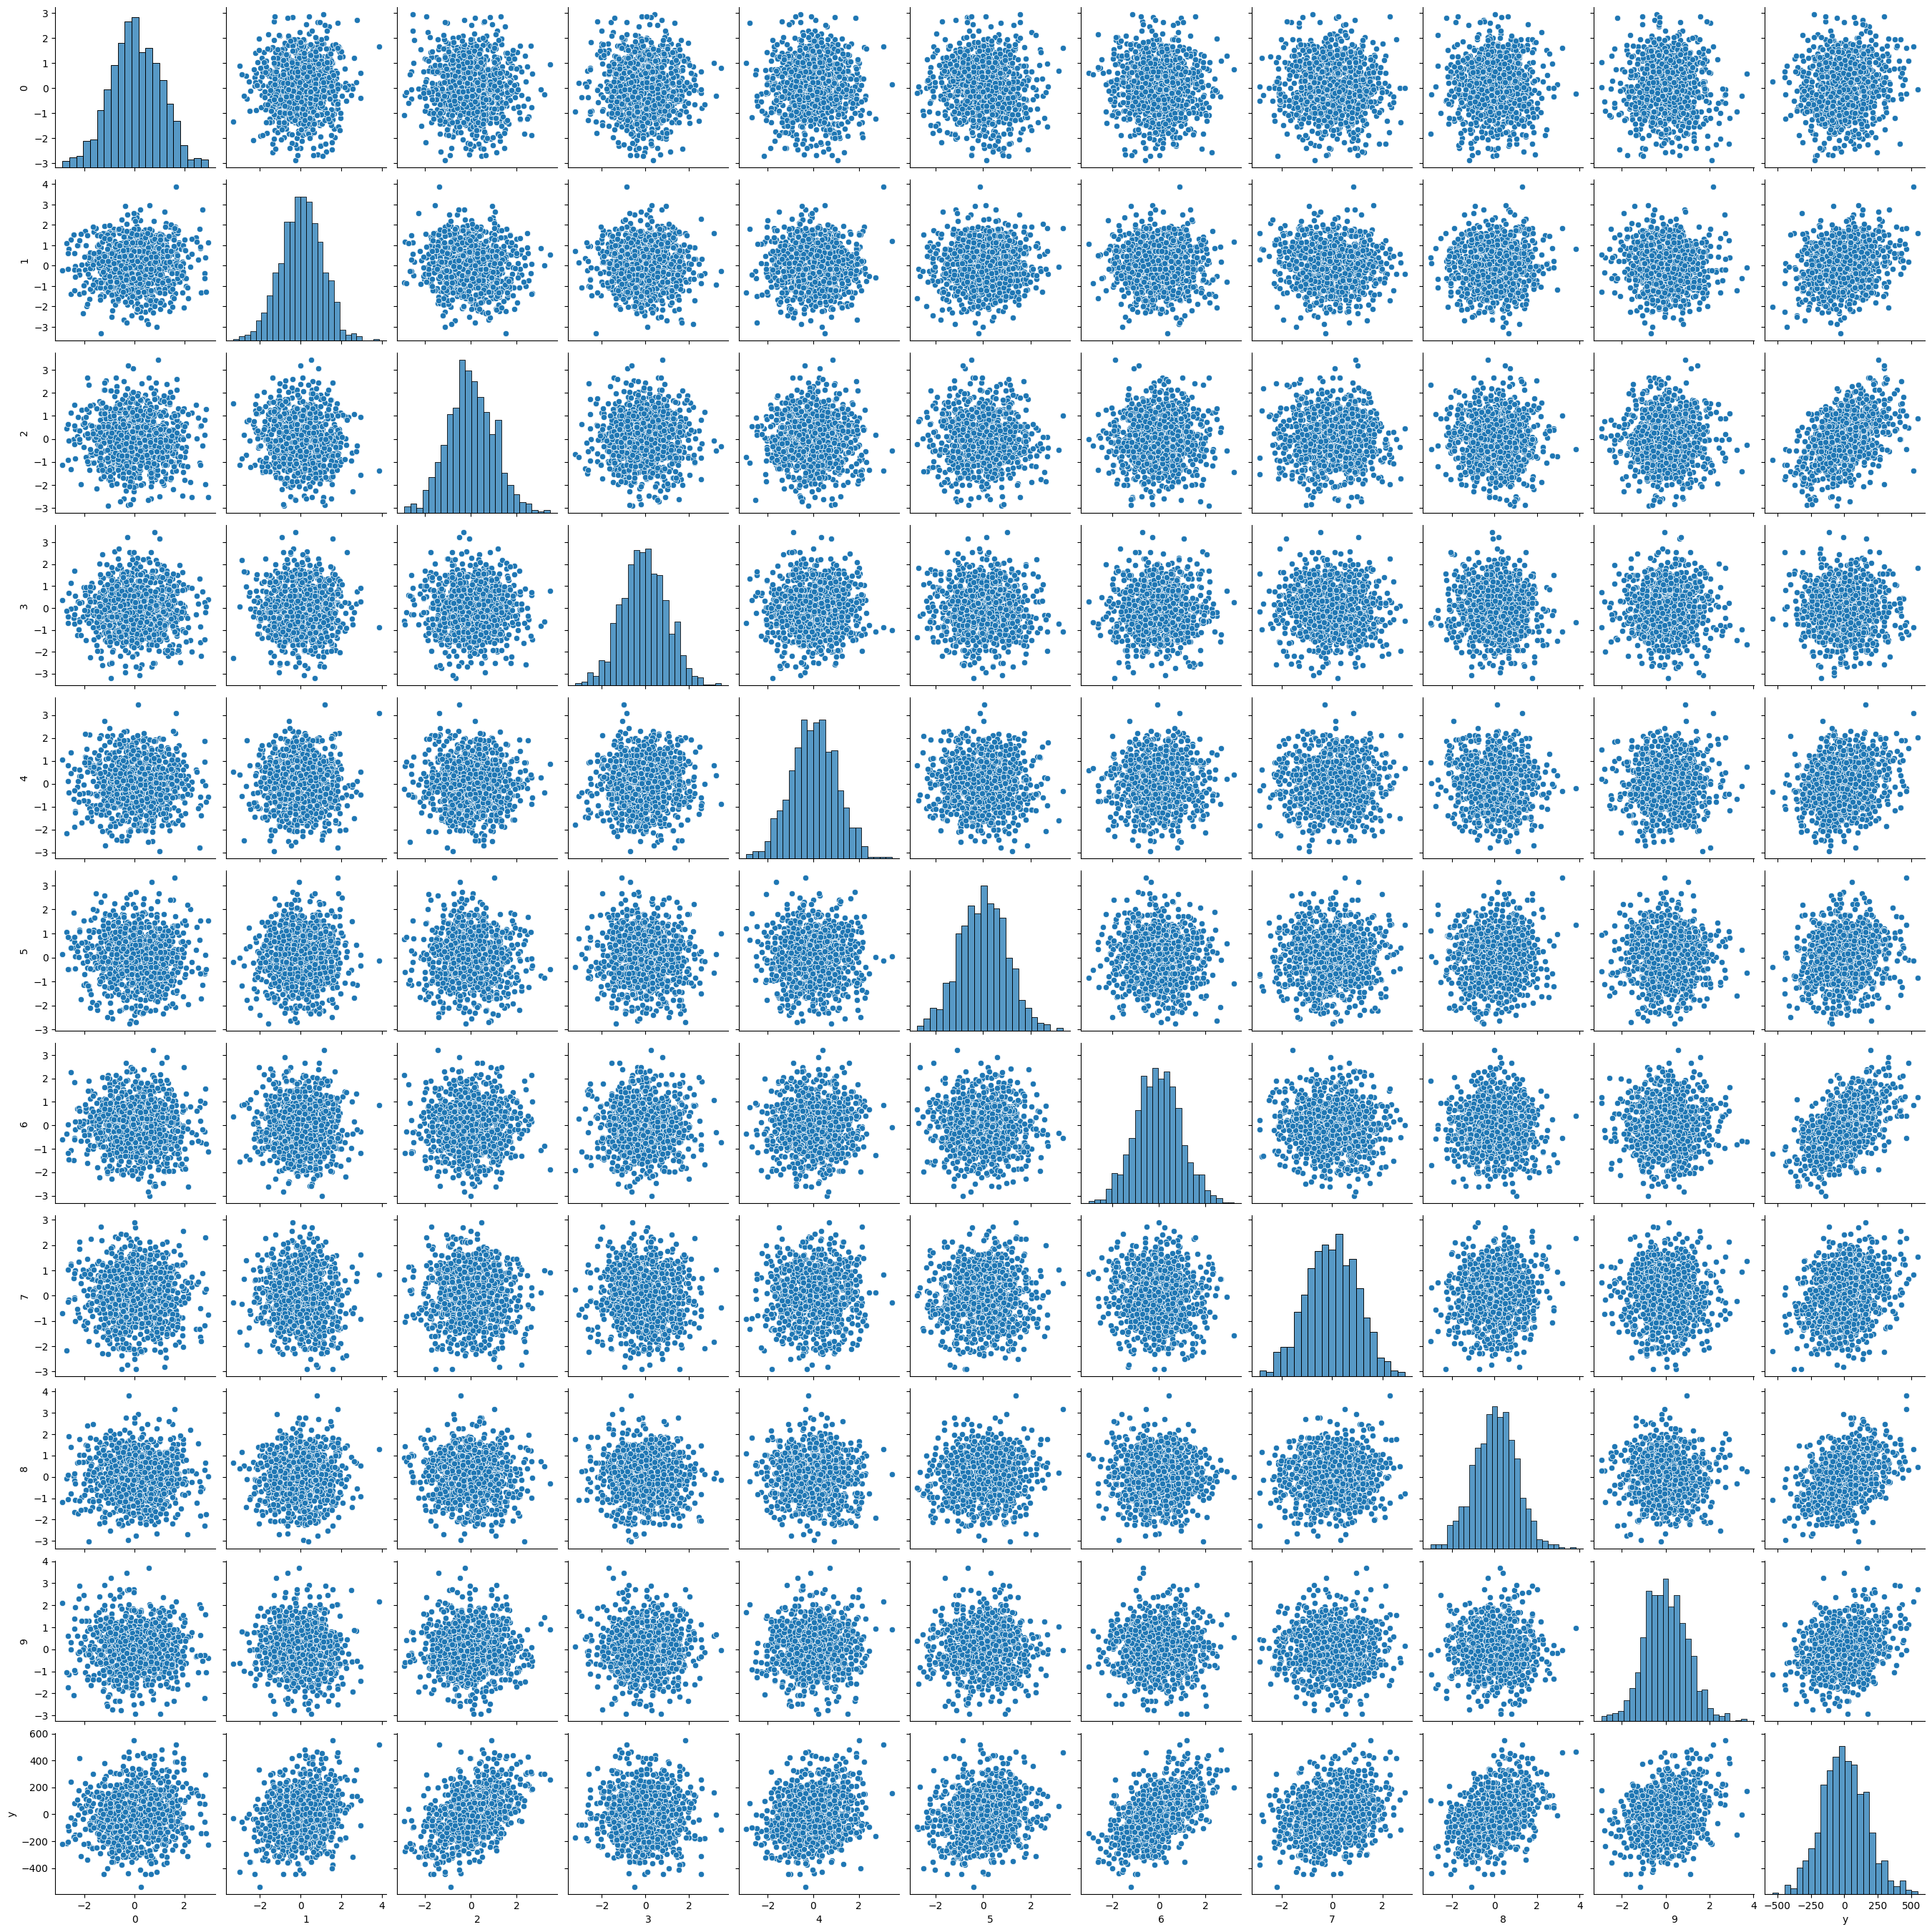

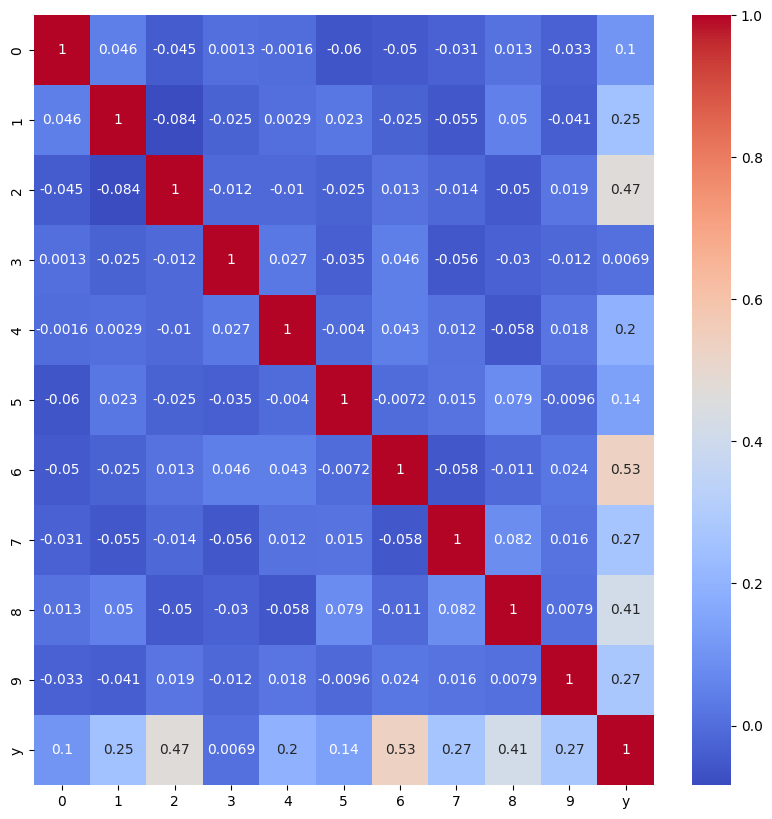

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램
data.hist(figsize=(10,10))
# Scatterplot matrix
sns.pairplot(data)
# Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# 요약 통계량
data.describe()

# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [14]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
data.columns = data.columns.astype(str)
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-2.363936,-0.052252,0.431294,0.046379,-1.231969,0.042293,-0.127191,1.000600,-1.112235,-1.090865,-0.918741
1,0.320696,0.879390,-0.764209,1.573461,2.022528,1.299192,1.033086,0.588093,0.688341,0.157967,1.575808
2,0.760480,0.788675,-0.982272,0.311390,1.271208,-1.180896,0.268496,-1.764577,0.409487,-0.875238,-0.461637
3,0.761649,-0.396382,2.101563,1.698214,1.929514,-2.180372,-0.516875,-0.818295,-1.858603,-0.934665,-0.269602
4,0.434254,1.365445,-0.250100,-0.352713,-1.376009,-0.556912,-0.642805,1.173184,-0.412929,-1.515824,-0.564753


# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

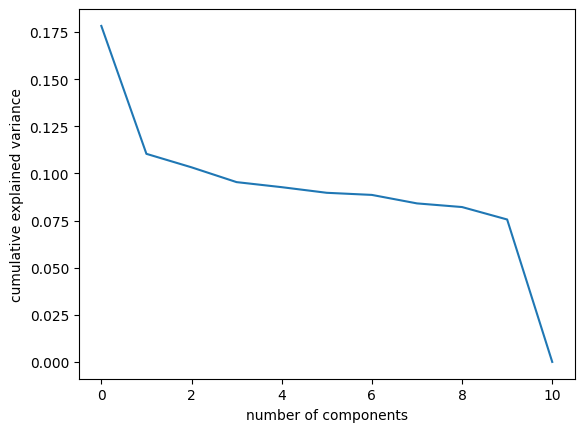

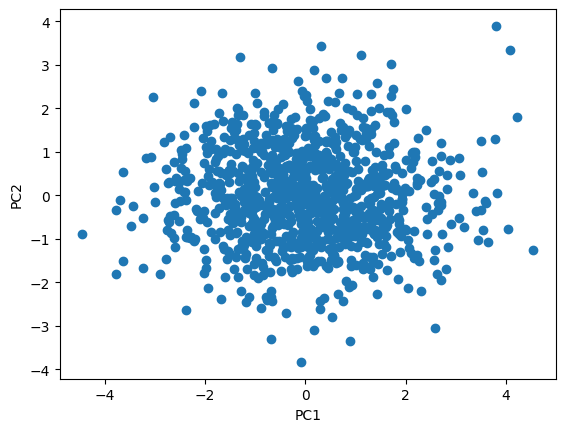

In [20]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA()
data_pca = pca.fit_transform(scaled_data)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca.head()
# Scree plot 그리기
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# PC1 와 PC2 산점도 그리기
plt.scatter(data_pca['PC1'], data_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [21]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=42)

#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []

# 회귀모형 적합

for i in range(1, 11):
  model = LinearRegression()
  x_train_pca = x_train.iloc[:, :i]
  x_test_pca = x_test.iloc[:, :i]
  model.fit(x_train.iloc[:, :i], y_train)
  y_train_pred = model.predict(x_train_pca)
  mse = mean_squared_error(y_train, y_train_pred)
  mse_train.append(mean_squared_error(y_train, y_train_pred))

print(mse_train)


[27993.281629017976, 26179.691715559966, 19358.617840716033, 19265.083617910343, 17464.833743813648, 16968.462254933092, 9268.769502804293, 6495.567545863663, 1921.0825185801632, 9.405852071898277e-05]


# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

In [26]:
# test MSE 저장
mse_test = []

for i in range(1, 11):
  model = LinearRegression()
  x_train_pca = x_train.iloc[:, :i]
  x_test_pca = x_test.iloc[:, :i]
  model.fit(x_train_pca, y_train)
  y_test_pred = model.predict(x_test_pca)
  mse_test.append(mean_squared_error(y_test, y_test_pred))

print(mse_test)

[27756.905543416375, 26194.861703850023, 19105.864988820438, 19301.03688941815, 19276.98341752956, 18334.316418942253, 9654.71280980782, 6404.220814428623, 1823.9109410400267, 0.00010096802975221565]
